In [0]:
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Model
import numpy as np
import random
import os

In [0]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

In [0]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

### Preprocessing the Images

In [52]:
plt.style.use('seaborn')
base_path = 'Images/'
dirs = os.listdir(base_path)
print(dirs)

['humans', 'dogs', 'cats', 'horses']


In [0]:
folder_path = ""
image_data = []
labels = []
label_dict = {'cats':0,'dogs':1,'horses':2,'humans':3}

In [0]:
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [55]:
print(len(image_data), len(labels))

808 808


In [0]:
combined = list(zip(image_data, labels))
random.shuffle(combined)
image_data[:],labels[:] = zip(*combined)

In [57]:
X_train = np.array(image_data)
Y_train = np.array(labels)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [58]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


### Creating the ResNet50 Model

In [59]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [60]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [61]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)
model_new = Model(inputs=model.input,outputs=fc2)
model_new.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [63]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f3279515208>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f34c8934ba8>
2 <keras.layers.convolutional.Conv2D object at 0x7f348130bba8>
3 <keras.layers.normalization.BatchNormalization object at 0x7f3279695b70>
4 <keras.layers.core.Activation object at 0x7f3279593d30>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f327951b160>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f32794f1a90>
7 <keras.layers.convolutional.Conv2D object at 0x7f327945c2e8>
8 <keras.layers.normalization.BatchNormalization object at 0x7f327945c6d8>
9 <keras.layers.core.Activation object at 0x7f327945c5f8>
10 <keras.layers.convolutional.Conv2D object at 0x7f32794670f0>
11 <keras.layers.normalization.BatchNormalization object at 0x7f32793e17b8>
12 <keras.layers.core.Activation object at 0x7f32793e1748>
13 <keras.layers.convolutional.Conv2D object at 0x7f32793ee048>
14 <keras.layers.convolutional.Conv2D object at 0x7f32793a06a0>
15 <keras.lay

### Fine Tuning

In [64]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

### Training The Model

In [65]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 10,
                    validation_split=0.20
                    )

Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 10s 16ms/step - loss: 1.4962 - acc: 0.3793 - val_loss: 0.7319 - val_acc: 0.7654
Epoch 2/10
646/646 [==============================] - 3s 5ms/step - loss: 0.8137 - acc: 0.7012 - val_loss: 0.3794 - val_acc: 0.9136
Epoch 3/10
646/646 [==============================] - 3s 5ms/step - loss: 0.4790 - acc: 0.8359 - val_loss: 0.2887 - val_acc: 0.9198
Epoch 4/10
646/646 [==============================] - 3s 5ms/step - loss: 0.3894 - acc: 0.8746 - val_loss: 0.2260 - val_acc: 0.9321
Epoch 5/10
646/646 [==============================] - 3s 5ms/step - loss: 0.2859 - acc: 0.9211 - val_loss: 0.1842 - val_acc: 0.9444
Epoch 6/10
646/646 [==============================] - 3s 5ms/step - loss: 0.2236 - acc: 0.9427 - val_loss: 0.1582 - val_acc: 0.9444
Epoch 7/10
646/646 [==============================] - 3s 5ms/step - loss: 0.1845 - acc: 0.9458 - val_loss: 0.1395 - val_acc: 0.9444
Epoch 8/10
646/646 [========

### Visualizing Accuracy & Loss

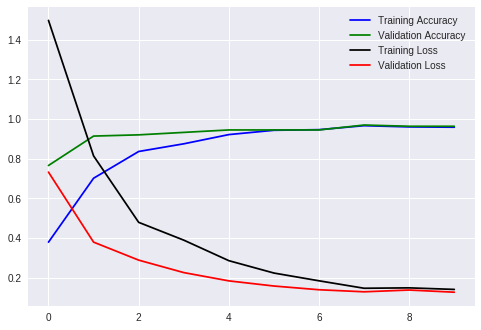

In [66]:
plt.figure(0)
plt.plot(hist.history['acc'],'b',label='Training Accuracy')
plt.plot(hist.history['val_acc'],'g',label='Validation Accuracy')
plt.plot(hist.history['loss'],'black',label='Training Loss')
plt.plot(hist.history['val_loss'],'red',label='Validation Loss')
plt.legend()
plt.show()